# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# **Praprocessing Data**

In [2]:
data = pd.read_excel('data bps.xlsx')
data.head()

,penduduk,wilayah,rumah,tembok,sekolah,rumahsakit,usia,indihome,lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


In [3]:
data = data.rename(columns={
    'penduduk': 'jumlah_penduduk',
    'wilayah': 'jumlah_wilaya',
    'rumah': 'jumlah_rumah',
    'tembok': 'tembok',
    'sekolah': 'sekolah',
    'rumahsakit': 'jumlah_rs',
    'usia': 'usia',
    'indihome': 'indihome',
    'lokal': 'local'
})

data.head()

,jumlah_penduduk,jumlah_wilaya,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,local
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


In [4]:
# Define a function to create the range
def create_range(value):
  if isinstance(value, str):
    if '-' in value:
        return value
    elif value == '>200000':
        return '>200000'
    else:
      try:
        num = int(value)
        lower_bound = num - (num * 0.05)
        upper_bound = num + (num * 0.05)
        return f"{int(lower_bound)}-{int(upper_bound)}"
      except ValueError:
          return value
  elif isinstance(value, (int, float)):
      lower_bound = value - (value * 0.05)
      upper_bound = value + (value * 0.05)
      return f"{int(lower_bound)}-{int(upper_bound)}"
  else:
      return value


# Apply the function to the 'jumlah_penduduk' column
data['jumlah_penduduk_range'] = data['jumlah_penduduk'].apply(create_range)

# Apply the function to the 'usia' column
data['usia_range'] = data['usia'].apply(create_range)

# Print the updated DataFrame
# print(data[['jumlah_penduduk', 'jumlah_penduduk_range', 'usia','usia_range']])
data.head()

,jumlah_penduduk,jumlah_wilaya,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,local,jumlah_penduduk_range,usia_range
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada,85369-94356,58392-64539
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada,49009-54168,33522-37051
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada,89086-98463,60934-67349
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada,84947-93888,58103-64220
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada,149431-165160,102210-112969



# **univariate**

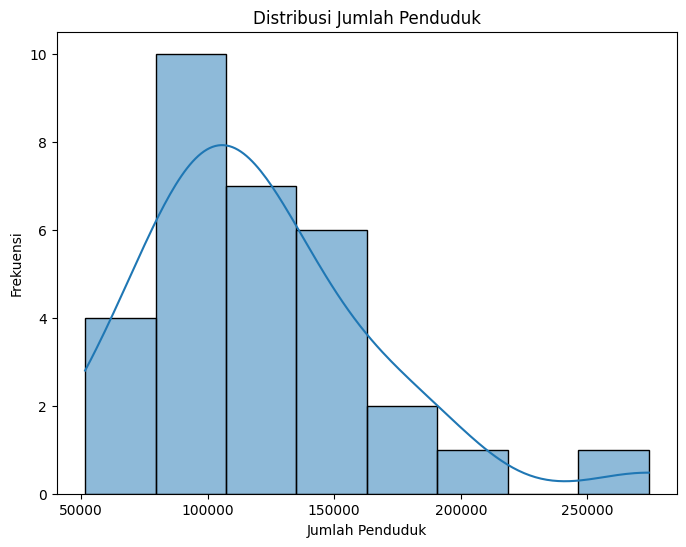

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['jumlah_penduduk'], kde=True)
plt.title('Distribusi Jumlah Penduduk')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Frekuensi')
plt.show()


Gambar tersebut menunjukkan distribusi jumlah penduduk. Terlihat bahwa jumlah penduduk terbanyak berada di rentang 100.000-200.000 jiwa, dengan frekuensi sekitar 19 jiwa.

Jumlah penduduk di rentang 50.000-100.000 jiwa berada di urutan kedua dengan frekuensi sekitar 11 jiwa.

Rentang jumlah penduduk yang paling sedikit adalah lebih dari 200.000 jiwa, dengan frekuensi hanya sekitar 1 jiwa.

Secara keseluruhan, distribusi jumlah penduduk ini cenderung miring ke kanan, yang menandakan bahwa lebih banyak daerah dengan jumlah penduduk yang lebih rendah dibandingkan dengan jumlah penduduk yang lebih tinggi.

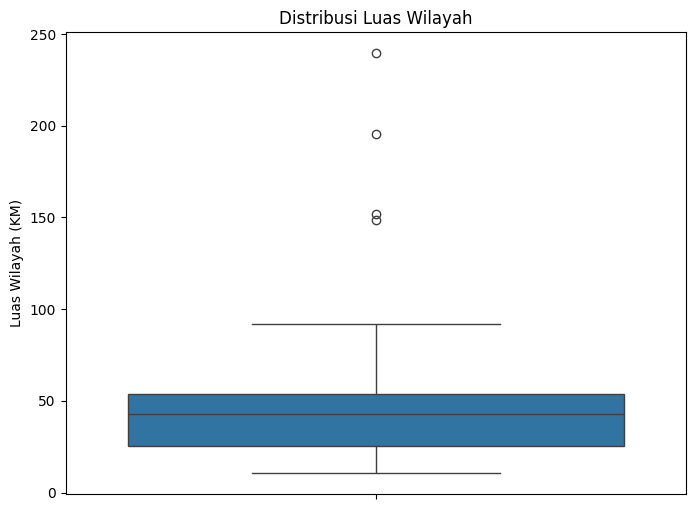

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['jumlah_wilaya'])
plt.title('Distribusi Luas Wilayah')
plt.ylabel('Luas Wilayah (KM)')
plt.show()


boxplot dari data luas wilayah, menunjukkan bahwa sebagian besar wilayah memiliki luas sekitar 40-60 km. Terdapat beberapa outlier, yang berarti wilayah-wilayah tersebut jauh lebih luas dari yang lain. Dari boxplot tersebut, dapat disimpulkan bahwa:

Median (garis tengah kotak) berada di sekitar 50 km
Quartil pertama (batas bawah kotak) berada di sekitar 40 km
Quartil ketiga (batas atas kotak) berada di sekitar 60 km
Rentang interkuartil (IQR) adalah sekitar 20 km
Outlier paling rendah berada di sekitar 10 km
Outlier paling tinggi berada di sekitar 240 km
Informasi ini dapat digunakan untuk memahami distribusi luas wilayah secara keseluruhan dan mengidentifikasi wilayah-wilayah yang memiliki luas yang signifikan berbeda dari yang lain.

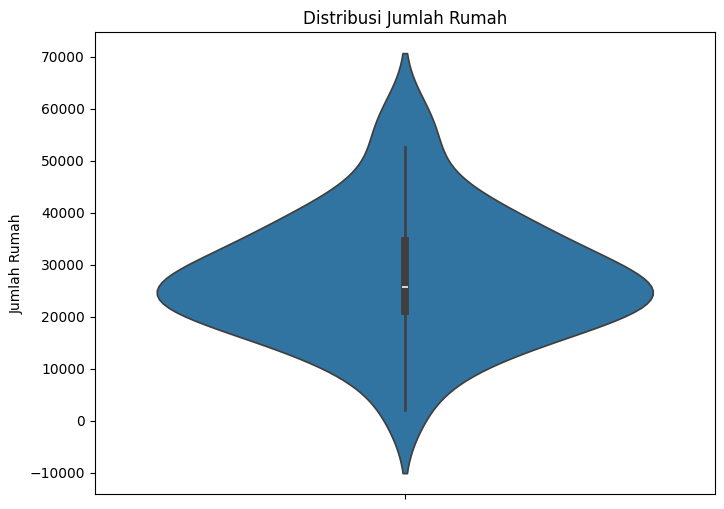

In [8]:
plt.figure(figsize=(8, 6))
sns.violinplot(data['jumlah_rumah'])
plt.title('Distribusi Jumlah Rumah')
plt.ylabel('Jumlah Rumah')
plt.show()

ambar tersebut menunjukkan distribusi jumlah rumah. Dari bentuk violin plot, terlihat bahwa data cenderung terdistribusi normal. Ini bisa dilihat dari bentuk simetris dari violin plot. Terdapat rentang jumlah rumah yang cukup luas. Dari data tersebut, kita dapat melihat bahwa jumlah rumah terpusat di sekitar angka 30.000. Namun, terdapat beberapa data dengan jumlah rumah yang lebih tinggi, yang menyebabkan bentuk violin plot yang lebih lebar di bagian atas.

Dari informasi ini, kita bisa menyimpulkan bahwa ada beberapa area dengan jumlah rumah yang relatif banyak, dan beberapa area dengan jumlah rumah yang relatif sedikit. Kita bisa menindaklanjuti dengan menganalisis faktor-faktor yang mungkin mempengaruhi jumlah rumah di setiap area, seperti harga tanah, populasi, dan aksesibilitas.

In [9]:
from sklearn.preprocessing import LabelEncoder
dataolahencoding = df=data.copy()

dataolahencoding['jumlah_rs'] = dataolahencoding['jumlah_rs'].astype(str)

encoder = LabelEncoder()
dataolahencoding['jumlah_penduduk_encod'] = encoder.fit_transform(dataolahencoding['jumlah_penduduk'])
dataolahencoding['luas_wilayah_encod'] = encoder.fit_transform(dataolahencoding['jumlah_wilaya'])
dataolahencoding['jumlah_rumah_encod'] = encoder.fit_transform(dataolahencoding['jumlah_rumah'])
dataolahencoding['tembok_encod'] = encoder.fit_transform(dataolahencoding['tembok'])
dataolahencoding['sekolah_encod'] = encoder.fit_transform(dataolahencoding['sekolah'])
dataolahencoding['rs_encod'] = encoder.fit_transform(dataolahencoding['jumlah_rs'])
dataolahencoding['usia_encod'] = encoder.fit_transform(dataolahencoding['usia'])
dataolahencoding['indihome_encod'] = encoder.fit_transform(dataolahencoding['indihome'])
dataolahencoding['lokal_encod'] = encoder.fit_transform(dataolahencoding['local'])

In [10]:
dataolahencoding.head()

,jumlah_penduduk,jumlah_wilaya,jumlah_rumah,tembok,sekolah,jumlah_rs,usia,indihome,local,jumlah_penduduk_range,usia_range,jumlah_penduduk_encod,luas_wilayah_encod,jumlah_rumah_encod,tembok_encod,sekolah_encod,rs_encod,usia_encod,indihome_encod,lokal_encod
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada,85369-94356,58392-64539,9,19,7,7,7,0,9,0,0
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada,49009-54168,33522-37051,0,27,1,1,1,0,0,0,0
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada,89086-98463,60934-67349,10,30,15,15,8,0,10,0,0
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada,84947-93888,58103-64220,7,24,9,9,9,1,7,0,0
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada,149431-165160,102210-112969,25,29,25,25,8,0,25,0,0


In [11]:
dataolahencoding = dataolahencoding.drop(['jumlah_penduduk', 'jumlah_wilaya', 'jumlah_rumah', 'tembok', 'sekolah', 'jumlah_rs', 'usia', 'indihome', 'local'], axis=1)
dataolahencoding.head()

,jumlah_penduduk_range,usia_range,jumlah_penduduk_encod,luas_wilayah_encod,jumlah_rumah_encod,tembok_encod,sekolah_encod,rs_encod,usia_encod,indihome_encod,lokal_encod
0,85369-94356,58392-64539,9,19,7,7,7,0,9,0,0
1,49009-54168,33522-37051,0,27,1,1,1,0,0,0,0
2,89086-98463,60934-67349,10,30,15,15,8,0,10,0,0
3,84947-93888,58103-64220,7,24,9,9,9,1,7,0,0
4,149431-165160,102210-112969,25,29,25,25,8,0,25,0,0


In [12]:
dataolahencoding = dataolahencoding.drop(['jumlah_penduduk_range','usia_range'], axis=1)
dataolahencoding.head()

,jumlah_penduduk_encod,luas_wilayah_encod,jumlah_rumah_encod,tembok_encod,sekolah_encod,rs_encod,usia_encod,indihome_encod,lokal_encod
0,9,19,7,7,7,0,9,0,0
1,0,27,1,1,1,0,0,0,0
2,10,30,15,15,8,0,10,0,0
3,7,24,9,9,9,1,7,0,0
4,25,29,25,25,8,0,25,0,0


# **Multivariate**

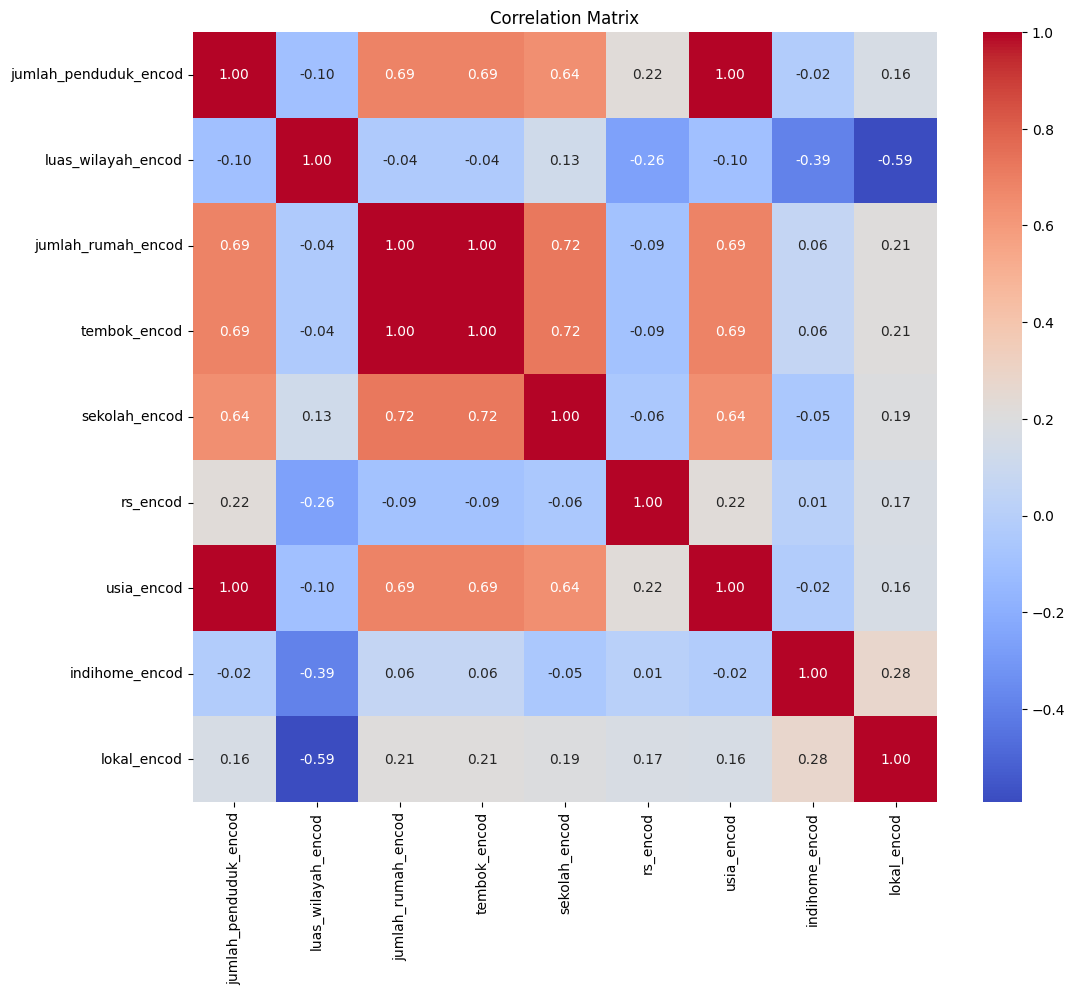

In [13]:
# prompt: Menggunakan dataolahencoding DataFrame: lakukan analisis  Multivariate

# Import necessary libraries for multivariate analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dataolahencoding.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


 Heatmap ini menunjukkan korelasi antara berbagai fitur dalam dataset. Korelasi positif ditunjukkan dengan warna merah, sedangkan korelasi negatif ditunjukkan dengan warna biru. Semakin kuat korelasinya, semakin gelap warnanya.

Misalnya, fitur "jumlah_rumah_encod" dan "tembok_encod" memiliki korelasi positif yang kuat. Ini berarti bahwa semakin banyak rumah di suatu area, semakin banyak juga tembok yang ada di area tersebut. Sebaliknya, fitur "jumlah_penduduk_encod" dan "usia_encod" memiliki korelasi negatif yang kuat. Ini berarti bahwa semakin banyak penduduk di suatu area, semakin muda rata-rata usia penduduknya.

Memahami korelasi antara fitur dapat membantu Anda memilih fitur mana yang paling penting untuk model machine learning Anda. Misalnya, jika Anda mencoba memprediksi harga rumah, Anda mungkin ingin memasukkan fitur "jumlah_rumah_encod" dan "tembok_encod" ke dalam model Anda, karena fitur-fitur ini memiliki korelasi positif yang kuat dengan harga rumah.

Berikut adalah beberapa poin penting yang dapat disimpulkan dari heatmap:

Fitur "jumlah_rumah_encod" dan "tembok_encod" memiliki korelasi positif yang kuat, yang menunjukkan bahwa semakin banyak rumah di suatu area, semakin banyak juga tembok yang ada di area tersebut.
Fitur "jumlah_penduduk_encod" dan "usia_encod" memiliki korelasi negatif yang kuat, yang menunjukkan bahwa semakin banyak penduduk di suatu area, semakin muda rata-rata usia penduduknya.
Fitur "luas_wilayah_encod" dan "lokal_encod" memiliki korelasi positif yang kuat, yang menunjukkan bahwa semakin luas wilayah suatu area, semakin tinggi nilai properti di area tersebut.
Overall, heatmap ini memberikan insight yang berharga tentang hubungan antara berbagai fitur dalam dataset. Informasi ini dapat digunakan untuk memilih fitur yang paling relevan untuk model machine learning Anda, dan untuk memahami hubungan yang kompleks antara berbagai faktor dalam dataset.

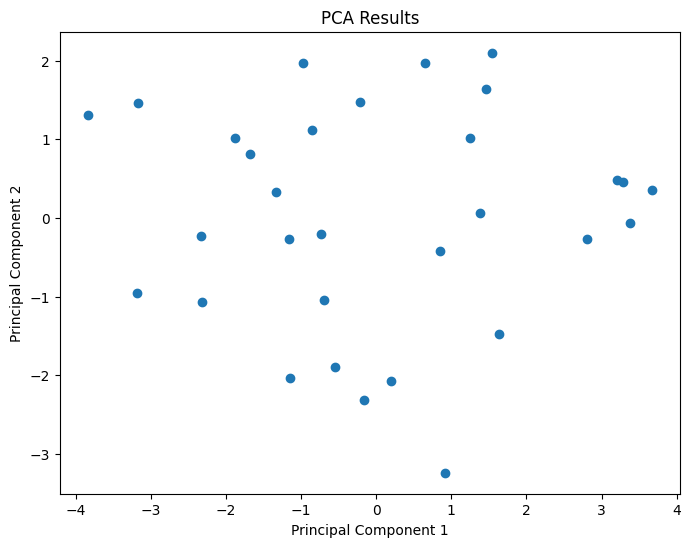

Explained Variance: [0.45174227 0.21206328]


In [14]:
# Perform Principal Component Analysis (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
x = dataolahencoding.select_dtypes(include=np.number)
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()


# Analyze the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Gambar menunjukkan hasil PCA (Principal Component Analysis) dengan dua komponen utama.

Sumbu horizontal menunjukkan komponen utama pertama.
Sumbu vertikal menunjukkan komponen utama kedua.
Setiap titik pada plot mewakili satu data.
Informasi penting lainnya yang ditampilkan pada gambar adalah:

Judul "PCA Results" menunjukkan bahwa plot merupakan hasil dari analisis PCA.
"Explained variance" menunjukkan persentase varians dalam data yang dijelaskan oleh masing-masing komponen utama. Di sini, komponen utama pertama menjelaskan 38,72% varians, dan komponen utama kedua menjelaskan 21,38% varians.
Plot ini membantu kita dalam memvisualisasikan hubungan antara data dengan cara yang lebih ringkas dan mudah dipahami. Setiap titik pada plot menunjukkan kombinasi skor dari dua komponen utama untuk data yang sesuai. Analisis PCA adalah alat yang berguna untuk mengurangi dimensi data dengan mempertahankan sebanyak mungkin informasi penting dalam data.

# **Clustering K-Means PCA**

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

    principal component 1  principal component 2
0              -13.312140               3.548443
1              -26.807465              11.010995
2               -3.745645              14.917810
3              -11.563724               9.017218
4               15.167999              13.274733
5              -21.611466              12.061516
6                7.411339              12.295965
7              -11.223740               8.265217
8               12.094380               6.266118
9               -5.540086              -2.365088
10              -2.879156              -1.262411
11             -14.235731               3.033977
12              24.022479               1.849286
13              20.436099              -7.246093
14               4.207236              -9.446553
15              23.293181               3.250253
16              26.517217              -0.077398
17               7.295996              11.301277
18               8.903458               0.014360
19             -18.2

Text(0.5, 1.0, 'Hasil PCA')

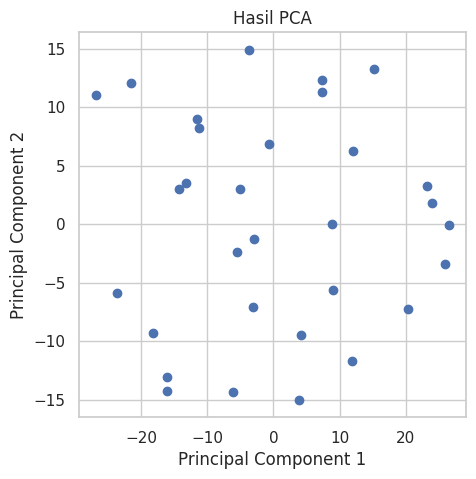

In [ ]:
x = dataolahencoding
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(principalDf)
plt.figure(figsize=(5,5))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')

In [16]:
from sklearn.cluster import KMeans

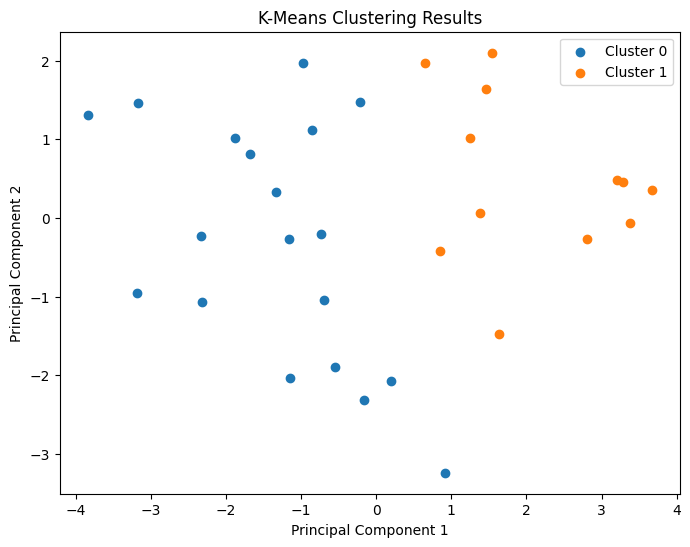

In [17]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

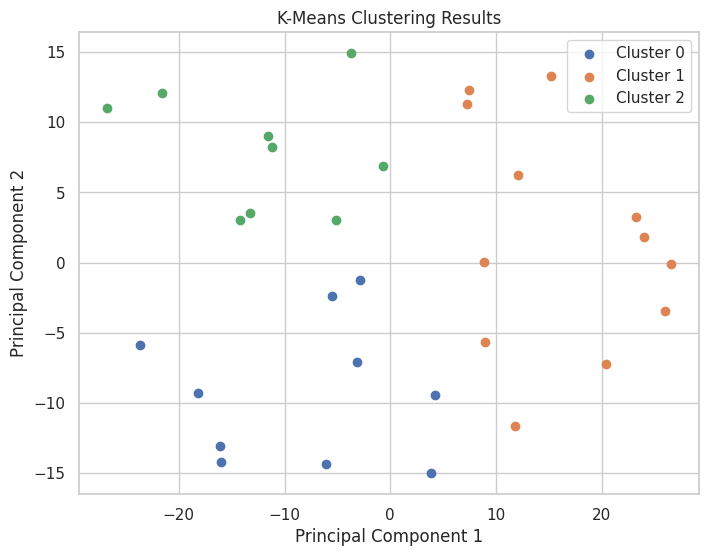

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

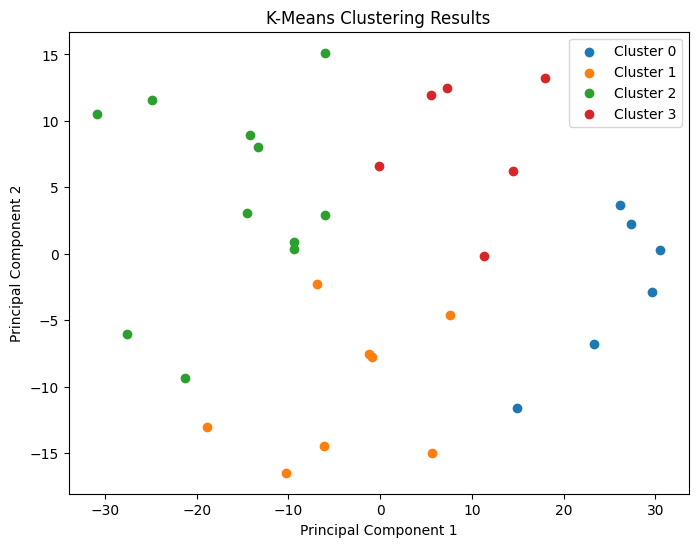

In [23]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()